In [30]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from datetime import datetime 

%matplotlib inline

In [31]:
idx = pd.IndexSlice

# Formatting the hirst file

This scripts produce individual stations timeseries for hirst measurements initially stored in a unique file.

In [32]:
dict_taxa = {
    "kaquerd1": "Quercus",
    "kaalnud1": "Alnus",
    "khpoacd1": "Poaceae",
    "kaplatd1": "Platanus",
    "kataxud1": "Taxus",
    "kapopud1": "Populus",
    "kafraxd1": "Fraxinus",
    "kafagud1": "Fagus",
    "kacuprd1": "Cupressaceae",
    "kacoryd1": "Corylus",
    "kabetud1": "Betula",
    "kaulmud1": "Ulmus",
}

In [33]:
FILE ='validation_input/data.csv'

In [34]:
df = pd.read_csv(FILE)

In [35]:
df

,parameter_name,parameter_id,installation_id,reference,meas_cat,value,load,station_id,nat_abbr,name
0,kamorad1,4820,4722,2019-01-08T00:00:00Z,1,0,2019-01-16T08:42:19Z,940,PZH,Zürich
1,kamorad1,4820,4722,2019-01-09T00:00:00Z,1,0,2019-01-16T09:18:50Z,940,PZH,Zürich
2,kamorad1,4820,4722,2019-01-10T00:00:00Z,1,0,2019-01-16T09:18:50Z,940,PZH,Zürich
3,kamorad1,4820,4722,2019-01-11T00:00:00Z,1,0,2019-01-16T09:23:50Z,940,PZH,Zürich
4,kamorad1,4820,4722,2019-01-12T00:00:00Z,1,0,2019-01-16T09:28:45Z,940,PZH,Zürich
...,...,...,...,...,...,...,...,...,...,...
764238,khzeamd1,4874,22959,2022-12-30T00:00:00Z,1,0,2023-01-04T11:04:21Z,5151,PPY,Payerne
764239,khzeamd1,4874,22959,2022-12-31T00:00:00Z,1,0,2023-01-04T11:04:21Z,5151,PPY,Payerne
764240,kaliqid1,4875,22959,2022-12-29T00:00:00Z,1,0,2023-01-04T11:04:21Z,5151,PPY,Payerne
764241,kaliqid1,4875,22959,2022-12-30T00:00:00Z,1,0,2023-01-04T11:04:21Z,5151,PPY,Payerne


In [36]:
col = ['parameter_id', 'reference', 'nat_abbr','value']
df_bis = df[col].pivot(index=['reference', 'nat_abbr'], columns='parameter_id')

In [37]:
df['nat_abbr'].unique()

array(['PZH', 'PLO', 'PBS', 'PBE', 'PBU', 'PLU', 'PLZ', 'PMU', 'PVI',
       'PNE', 'PGE', 'PLS', 'PCF', 'PPY', 'PDS', 'BLR', 'PME'],
      dtype=object)

In [38]:
df['nat_abbr'].unique()

array(['PZH', 'PLO', 'PBS', 'PBE', 'PBU', 'PLU', 'PLZ', 'PMU', 'PVI',
       'PNE', 'PGE', 'PLS', 'PCF', 'PPY', 'PDS', 'BLR', 'PME'],
      dtype=object)

In [39]:
#create one file per stations

DIR = 'validation_input/hirst/'

if not os.path.isdir(DIR):
    os.makedirs(DIR)
    
for station in df['nat_abbr'].unique():
    
    df_hirst = df_bis.loc[idx[:, station], :].reset_index().set_index('reference').drop('nat_abbr', axis=1)
    df_hirst = df_hirst.set_index(pd.to_datetime(df_hirst.index))
    df_hirst.columns =df_hirst.columns.droplevel()
    
    #Define the filename of the saved csv
    FILENAME = 'hirst' + '_' + station + '_' + df_hirst.index[0].strftime("%m%d%Y") + '-' + df_hirst.index[-1].strftime("%m%d%Y") + '.csv'
    
    #save the file
    df_hirst.to_csv(os.path.join(DIR, FILENAME))
    

<ipython-input-39-199637363f71>:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_hirst = df_bis.loc[idx[:, station], :].reset_index().set_index('reference').drop('nat_abbr', axis=1)
<ipython-input-39-199637363f71>:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_hirst = df_bis.loc[idx[:, station], :].reset_index().set_index('reference').drop('nat_abbr', axis=1)
<ipython-input-39-199637363f71>:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_hirst = df_bis.loc[idx[:, station], :].reset_index().set_index('reference').drop('nat_abbr', axis=1)
<ipython-input-39-199637363f71>:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_hirst = df_bis.loc[idx[:, station], :].reset_index().set_index('reference').drop('nat_abbr', 

In [40]:
test = pd.read_csv(os.path.join(DIR, FILENAME), index_col='reference')

<AxesSubplot: xlabel='reference'>

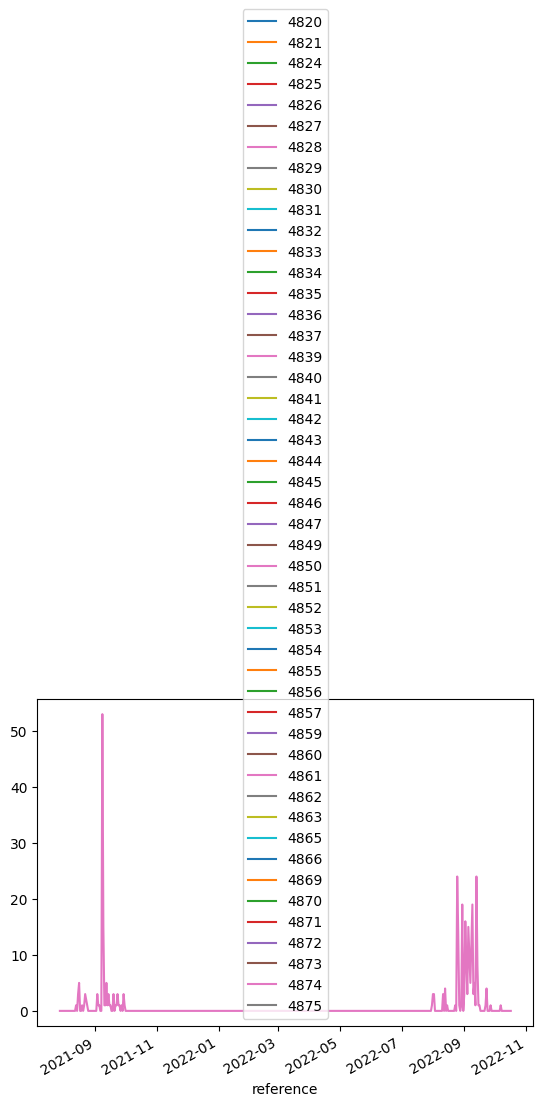

In [41]:
test.set_index(pd.to_datetime(test.index)).plot()

In [42]:
FILE2 = 'validation_input/hirst_pay_19022020-01112021.csv'
df2 = pd.read_csv(FILE2)

In [43]:
df2

,Station,Year,Month,Day,Hour,Minute,4819,4820,4821,4822,...,4866,4867,4868,4869,Poaceae,4871,4872,4873,4874,4875
0,5151,2020,2,1,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
1,5151,2020,2,2,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
2,5151,2020,2,3,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
3,5151,2020,2,4,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
4,5151,2020,2,5,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,5151,2021,10,28,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
636,5151,2021,10,29,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
637,5151,2021,10,30,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
638,5151,2021,10,31,0,0,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
